# Import e funzioni ausiliarie

In [1]:
from tensorflow import keras as k
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
func = lambda x: np.sin(x)

In [3]:
x = np.linspace(0,40,4000)
y = func(x)

# data = np.concatenate([x.reshape(x.shape[0], 1), y.reshape(y.shape[0], 1)], axis=1)
# print(data)

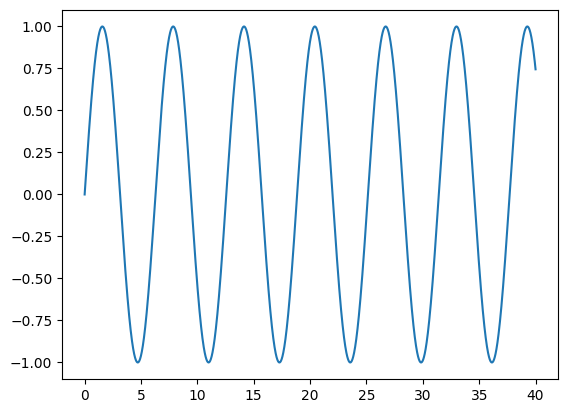

In [4]:
plt.plot(x,y)
# plt.plot(data)

In [5]:
def time_step(data, step=10):
    x,y = [],[]
    for i in range(data.shape[0] - step):
        x.append(data[i:i+step])
        y.append(data[i+step])
    
    return np.array(x), np.array(y)

In [6]:
def time_step(data, label, step=10):
    
    x,y = [],[]
    for i in range(data.shape[0] - step):
        x.append(data[i:i+step])
        y.append(label[i+step])
    
    return np.array(x), np.array(y)

In [7]:
xt,yt = time_step(x, y)
xt = xt.reshape(*xt.shape, 1)
yt = yt.reshape(*yt.shape, 1)
# xt,yt = time_step(data)

In [8]:
model = k.models.Sequential(
    [
        k.layers.GRU(128),
        k.layers.Flatten(),
        k.layers.Dense(300),
        k.layers.Dense(1)
    ]
)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-12-20 17:22:33.010493: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-20 17:22:33.010641: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(0.0001),
    metrics=['mse']
)
model(xt)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (3990, 128)               50304     
                                                                 
 flatten (Flatten)           (3990, 128)               0         
                                                                 
 dense (Dense)               (3990, 300)               38700     
                                                                 
 dense_1 (Dense)             (3990, 1)                 301       
                                                                 
Total params: 89,305
Trainable params: 89,305
Non-trainable params: 0
_________________________________________________________________


In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.fit(xt, yt, epochs=500, callbacks=[callback], batch_size=64)

Epoch 1/500


2022-12-20 17:22:33.643774: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-20 17:22:35.076405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-20 17:22:35.270263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/63 [..............................] - ETA: 2:04 - loss: 1.5134 - mse: 1.5134

2022-12-20 17:22:35.500636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 3s 19ms/step - loss: 0.5630 - mse: 0.5630
Epoch 2/500
63/63 [==============================] - 1s 16ms/step - loss: 0.5052 - mse: 0.5052
Epoch 3/500
63/63 [==============================] - 1s 15ms/step - loss: 0.5030 - mse: 0.5030
Epoch 4/500
63/63 [==============================] - 1s 15ms/step - loss: 0.5004 - mse: 0.5004
Epoch 5/500
63/63 [==============================] - 1s 15ms/step - loss: 0.5033 - mse: 0.5033
Epoch 6/500
63/63 [==============================] - 1s 15ms/step - loss: 0.5099 - mse: 0.5099
Epoch 7/500
63/63 [==============================] - 1s 15ms/step - loss: 0.5021 - mse: 0.5021
Epoch 8/500
63/63 [==============================] - 1s 15ms/step - loss: 0.4978 - mse: 0.4978
Epoch 9/500
63/63 [==============================] - 1s 15ms/step - loss: 0.4947 - mse: 0.4947
Epoch 10/500
63/63 [==============================] - 1s 15ms/step - loss: 0.4919 - mse: 0.4919
Epoch 11/500
63/63 [==============================] - 1s 16ms

 10/125 [=>............................] - ETA: 0s 

2022-12-20 17:28:52.813876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-20 17:28:52.875098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 1s 6ms/step


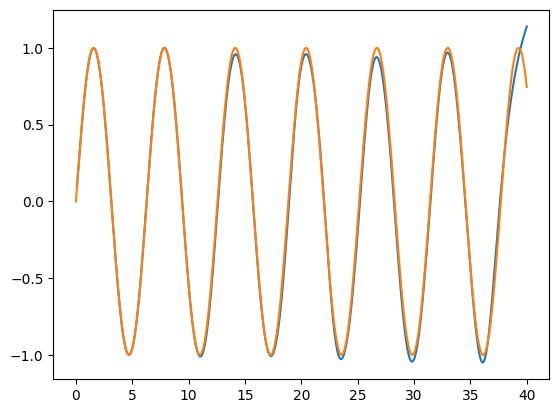

In [11]:
predicted = model.predict(xt)
plt.plot(x[10:], predicted[:, -1])
plt.plot(x, y)

  1/188 [..............................] - ETA: 1:24 - loss: 0.4200 - mse: 0.4200

2022-12-20 17:28:54.298010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-20 17:28:54.363555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 1s 6ms/step


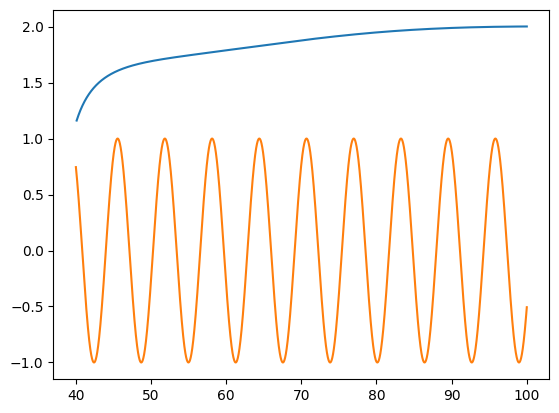

In [12]:
x_test = np.linspace(40,100,6000)
y_test = func(x_test)
x_prova, y_prova = time_step(x_test, y_test)
# data_t = np.concatenate([x_test.reshape(x_test.shape[0], 1), y_test.reshape(y_test.shape[0], 1)], axis=1)
# x_prova, y_prova = time_step(data_t)

x_prova = x_prova.reshape(*x_prova.shape, 1)
y_prova = y_prova.reshape(*y_prova.shape, 1)
model.evaluate(x_prova, y_prova)
predicted2 = model.predict(x_prova)
plt.plot(x_test[10:], predicted2[:, -1])
plt.plot(x_test,y_test)
